Traceback (most recent call last):
  File "/home/ikuo/develop/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py", line 388, in process
    proxy(*args, **kwargs)
  File "/home/ikuo/develop/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py", line 228, in __call__
    return mtd(*args, **kwargs)
  File "/home/ikuo/develop/anaconda3/lib/python3.6/site-packages/matplotlib/animation.py", line 1499, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


<IPython.core.display.Javascript object>


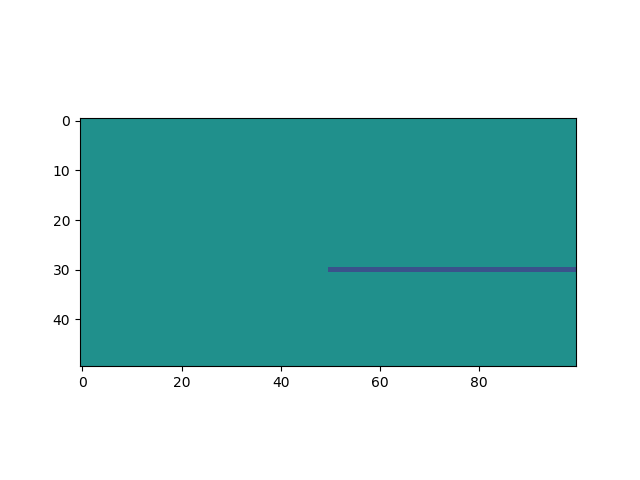

0.027529418468475342


In [66]:
%matplotlib notebook

import matplotlib.pyplot as plt
import numpy as np
import time

data1 = np.full((50, 100), 200)
data1[5, 5] = 0
data2 = np.full((50, 100), 50)
#data2[10, 10] = 50
data3 = np.full((50, 100), 100)
#data3[18, 40] = 50

fig, ax = plt.subplots()
image = ax.imshow(data1)
fig.canvas.draw()
fig.canvas.flush_events()

tstart = time.time()
for i in range(100):
    if i < 1:
        image.set_data(data1)
    elif i < 50:
        data2[20, i] =  180
        image.set_data(data2)
    else:
        data3[30, i] =  50
        image.set_data(data3)
    fig.canvas.draw()
    fig.canvas.flush_events()
    
elapsed = time.time() - tstart
print(elapsed/100)

<IPython.core.display.Javascript object>


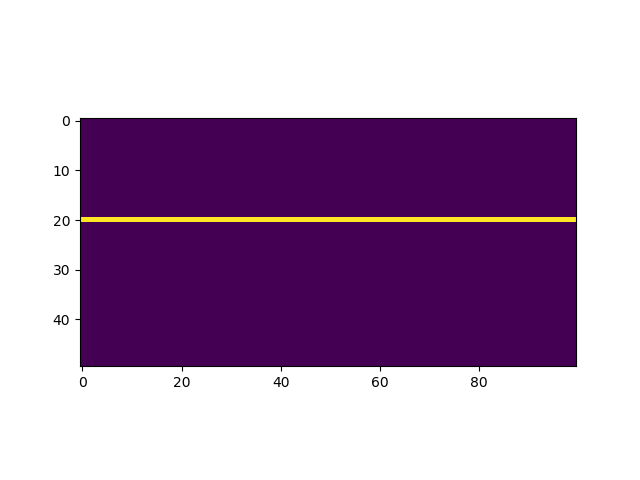

0.30379934549331666


In [65]:
#%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import time

    
image1 = np.zeros((50, 100))
image2 = np.full((50, 100), 200)

fig,ax = plt.subplots(1,1)
    
plt.imshow(image1)
fig.canvas.draw()
fig.show()
    
tstart = time.time()
for x in range(100):
    image1[20, x] = 78
    plt.imshow(image1)
    fig.canvas.draw()
elapsed = time.time() - tstart
print(elapsed/100)

<IPython.core.display.Javascript object>


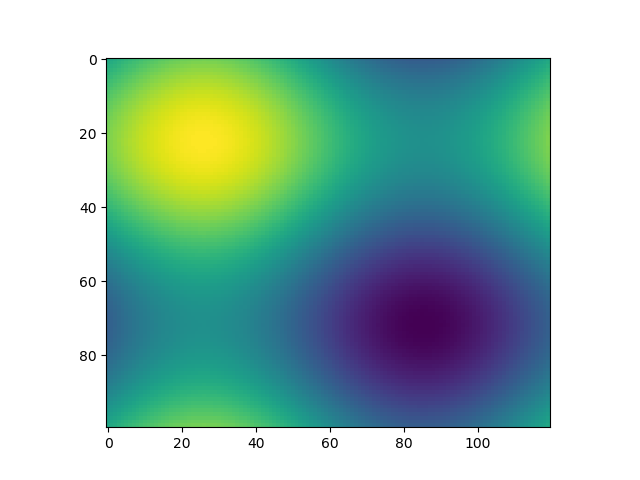

In [64]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

fig = plt.figure()


def f(x, y):
    return np.sin(x) + np.cos(y)

x = np.linspace(0, 2 * np.pi, 120)
y = np.linspace(0, 2 * np.pi, 100).reshape(-1, 1)
# ims is a list of lists, each row is a list of artists to draw in the
# current frame; here we are just animating one artist, the image, in
# each frame
ims = []
for i in range(60):
    x += np.pi / 15.
    y += np.pi / 20.
    im = plt.imshow(f(x, y), animated=True)
    ims.append([im])

ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True,
                                repeat_delay=1000)

# ani.save('dynamic_images.mp4')

plt.show()

<IPython.core.display.Javascript object>


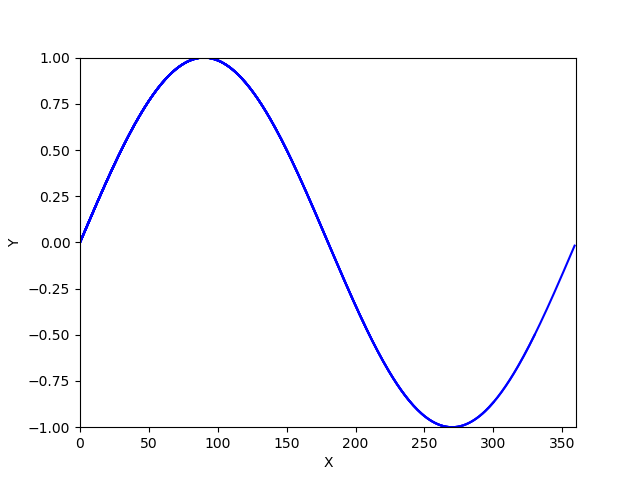

In [62]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import time

def plt_dynamic(x, y, ax, colors=['b']):
    for color in colors:
        ax.plot(x, y, color)
    fig.canvas.draw()
    
fig,ax = plt.subplots(1,1)
ax.set_xlabel('X') ; ax.set_ylabel('Y')
ax.set_xlim(0,360) ; ax.set_ylim(-1,1)
xs, ys = [], []

# this is any loop for which you want to plot dynamic updates.
# in my case, I'm plotting loss functions for neural nets
for x in range(360):
    y = np.sin(x*np.pi/180)
    xs.append(x)
    ys.append(y)
    if x % 30 == 0:
        plt_dynamic(xs, ys, ax)
        time.sleep(.2)
plt_dynamic(xs, ys, ax)

<IPython.core.display.Javascript object>


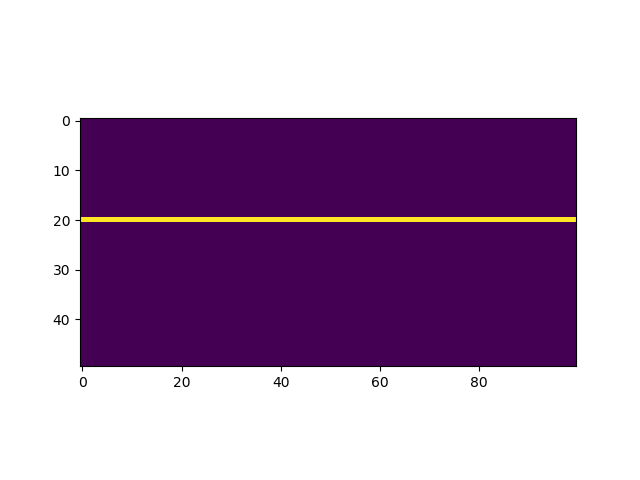

<IPython.core.display.Javascript object>


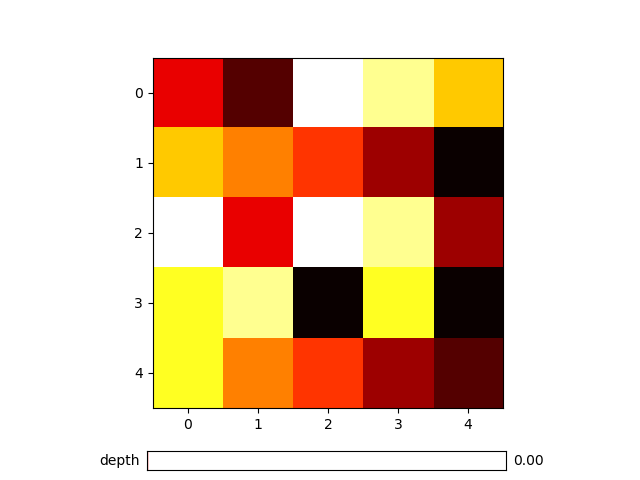

In [80]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.widgets import Slider

# generate a five layer data 
data = np.random.randint(10, size=(5, 5, 5))
# current layer index start with the first layer 
idx = 0

# figure axis setup 
fig, ax = plt.subplots()
fig.subplots_adjust(bottom=0.15)

# display initial image 
im_h = ax.imshow(data[:, :, idx], cmap='hot', interpolation='nearest')

# setup a slider axis and the Slider
ax_depth = plt.axes([0.23, 0.02, 0.56, 0.04])
slider_depth = Slider(ax_depth, 'depth', 0, data.shape[2]-1, valinit=idx)

# update the figure with a change on the slider 
def update_depth(val):
    idx = int(round(slider_depth.val))
    im_h.set_data(data[:, :, idx])

slider_depth.on_changed(update_depth)

plt.show()

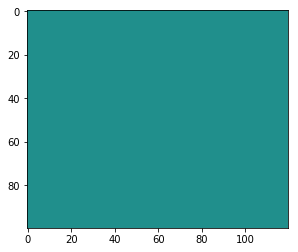

In [2]:


import random, math
import numpy as np
import scipy, scipy.stats

import matplotlib.pyplot as plt
import matplotlib.animation as animation


from matplotlib.patches import Circle
from matplotlib.collections import PatchCollection

data = np.zeros((50, 100))

def f(x, y):
    return np.sin(x) + np.cos(y)

x = np.linspace(0, 2*np.pi, 120)
y = np.linspace(0, 2*np.pi, 100).reshape(-1, 1)
    
# create a simple image to animate
fig = plt.figure()
IM = plt.imshow(f(x,y),interpolation='none')
ax = fig.gca()
ax.set_aspect("equal")

    
def init():
    IM.set_data( np.zeros((100,120)) )
    return [IM]

def animate(i):
    print(i)
    dx = i * np.pi/15.0
    dy = i * np.pi/5.0
    IM.set_data( f(x+dx,y+dy) )
    return [IM]

animation.FuncAnimation(fig, animate, init_func=init,
                        frames=100, interval=25, blit=True)

<IPython.core.display.Javascript object>


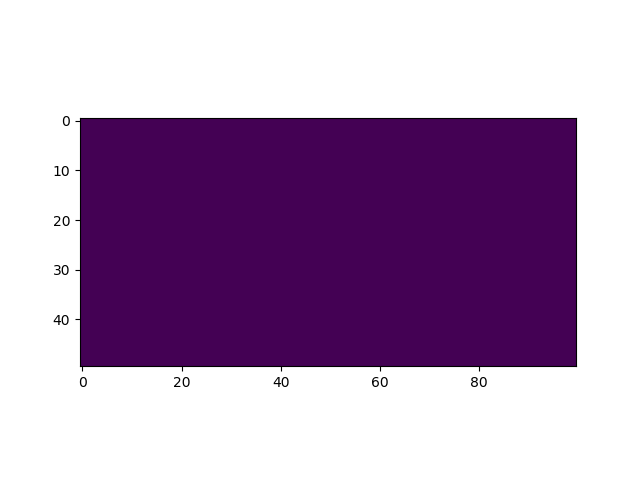

0.030486066341400147


In [49]:
%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib import animation

def create_circle():
    circle = plt.Circle((0,0), radius=0.15)
    return circle

def update_radius(i, circle):
    circle.set_radius(i*0.5)
    return circle,

fig = plt.figure(1)
ax = plt.axes(xlim=(-10,10), ylim=(-10,10))
ax.set_aspect('equal')
circle = create_circle()
ax.add_artist(circle)
anim = animation.FuncAnimation(fig, update_radius, fargs=(circle,),
                               frames=30, interval=50)
plt.title('Simple Circle Animation')

plt.show()

In [ ]:
%matplotlib
"""
Matplotlib Animation Example

author: Jake Vanderplas
email: vanderplas@astro.washington.edu
website: http://jakevdp.github.com
license: BSD
Please feel free to use and modify this, but keep the above information. Thanks!
"""

import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation

# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()
ax = plt.axes(xlim=(0, 2), ylim=(-2, 2))
line, = ax.plot([], [], lw=2)

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,

# animation function.  This is called sequentially
def animate(i):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return line,

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=200, interval=20, blit=True)

# save the animation as an mp4.  This requires ffmpeg or mencoder to be
# installed.  The extra_args ensure that the x264 codec is used, so that
# the video can be embedded in html5.  You may need to adjust this for
# your system: for more information, see
# http://matplotlib.sourceforge.net/api/animation_api.html
#anim.save('basic_animation.mp4', fps=30, extra_args=['-vcodec', 'libx264'])

plt.show()

<IPython.core.display.Javascript object>

case1: 36fps


<IPython.core.display.Javascript object>

case1: 88fps


<IPython.core.display.Javascript object>


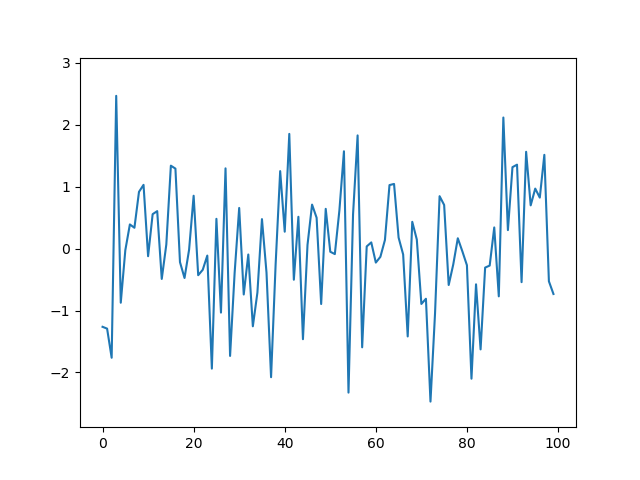

case3: 33fps


<IPython.core.display.Javascript object>


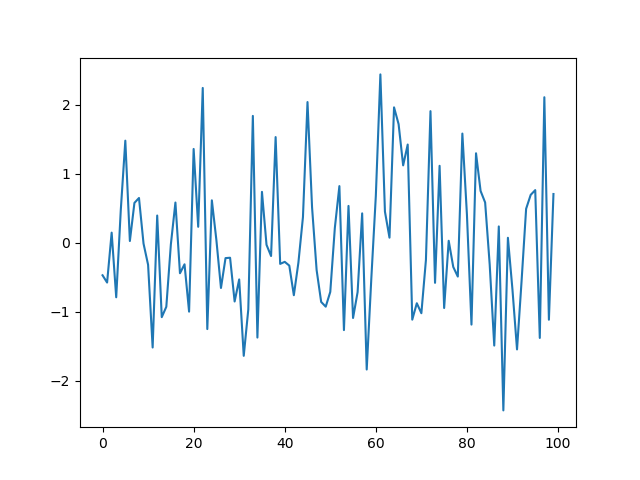

case4: 759fps


<IPython.core.display.Javascript object>


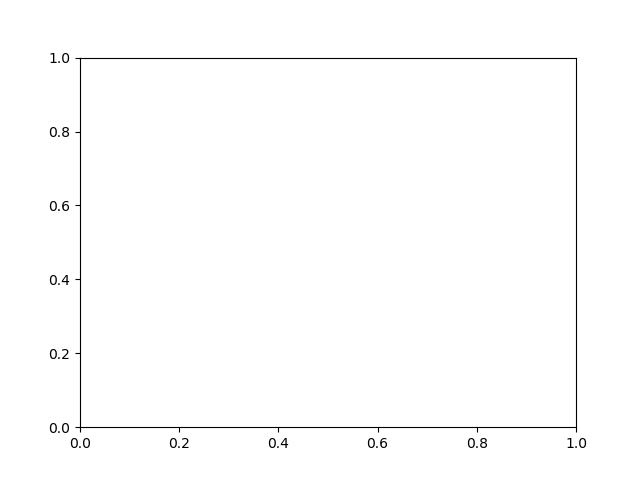

case5: 896fps


<IPython.core.display.Javascript object>


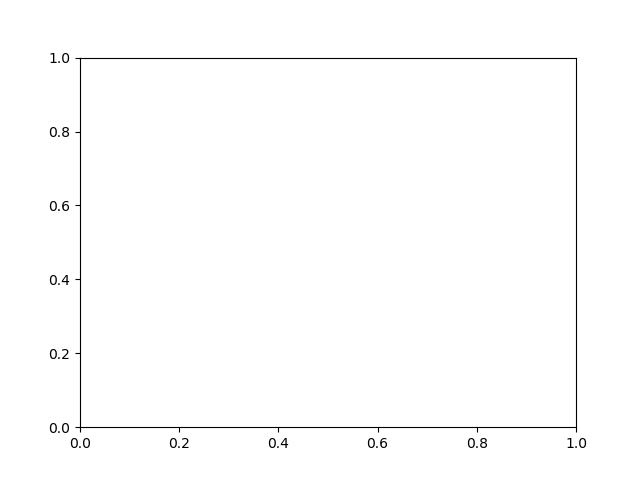

AttributeError: 'FigureCanvasNbAgg' object has no attribute 'update'

In [68]:
import matplotlib.pyplot as plt
import numpy as np
import time

from scipy.stats._continuous_distns import t_gen


def case1():

    fig, ax = plt.subplots()

    t_start = time.time()
    num_plot = 0

    while time.time() - t_start < 1:
        ax.clear()
        ax.plot(np.random.randn(100))
        plt.pause(0.001)

        num_plot += 1

    return num_plot


def case2():

    fig, ax = plt.subplots()
    line, = ax.plot(np.random.randn(100))

    t_start = time.time()
    num_plot = 0

    while time.time() - t_start < 1:
        line.set_ydata(np.random.randn(100))
        plt.pause(0.001)

        num_plot += 1

    return num_plot


def case3():

    fig, ax = plt.subplots()
    line, = ax.plot(np.random.randn(100))
    fig.canvas.draw()
    fig.show()

    t_start = time.time()
    num_plot = 0

    while time.time() - t_start < 1:
        line.set_ydata(np.random.randn(100))
        fig.canvas.draw()
        fig.canvas.flush_events() # <-これがないと画面に描画されない。

        num_plot += 1

    return num_plot

def case4():

    fig, ax = plt.subplots()
    line, = ax.plot(np.random.randn(100))
    fig.canvas.draw()
    fig.show()

    t_start = time.time()
    num_plot = 0

    while time.time() - t_start < 1:
        line.set_ydata(np.random.randn(100))

        ax.draw_artist(ax.patch)
        ax.draw_artist(line)
        #fig.canvas.update()
        fig.canvas.blit(ax.bbox)

        fig.canvas.flush_events()
        num_plot += 1

    return num_plot

def case5():

    fig, ax = plt.subplots()
    fig.canvas.draw()

    bg = fig.canvas.copy_from_bbox(ax.bbox)

    line, = ax.plot(np.random.randn(100))
    fig.show()

    t_start = time.time()
    num_plot = 0

    while time.time() - t_start < 1:
        line.set_ydata(np.random.randn(100))

        fig.canvas.restore_region(bg)
        ax.draw_artist(line)

        #fig.canvas.update()
        fig.canvas.blit(ax.bbox)

        fig.canvas.flush_events()
        num_plot += 1

    return num_plot


def case6():

    fig, ax = plt.subplots()
    fig.canvas.draw()

    bg = fig.canvas.copy_from_bbox(ax.bbox)

    line, = ax.plot(np.random.randn(100))
    fig.show()

    t_start = time.time()
    num_plot = 0

    while time.time() - t_start < 1:
        line.set_ydata(np.random.randn(100))

        fig.canvas.restore_region(bg)
        ax.draw_artist(line)

        fig.canvas.update()

        fig.canvas.flush_events()
        num_plot += 1

    return num_plot


if __name__ == "__main__":
    print("case1: " + str(case1()) + "fps")
    print("case1: " + str(case2()) + "fps")
    print("case3: " + str(case3()) + "fps")
    print("case4: " + str(case4()) + "fps")
    print("case5: " + str(case5()) + "fps")
    print("case6: " + str(case6()) + "fps")
